In [1]:
!pip install pycaret[analysis]
!pip install shap
from pycaret.datasets import get_data
data = get_data('pokemon')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 11.1 MB

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [2]:
print(data)
data.info()
data.describe()

       #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generatio

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [3]:
valores_faltantes = data.isna().sum()
print(valores_faltantes)
data.fillna("")

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [4]:
from pycaret.classification import *
s = setup(data, target = 'Legendary', session_id = 123,fold=5)
best = compare_models(sort="MCC")

,Description,Value
0,Session id,123
1,Target,Legendary
2,Target type,Binary
3,Original data shape,"(800, 13)"
4,Transformed data shape,"(800, 47)"
5,Transformed train set shape,"(560, 47)"
6,Transformed test set shape,"(240, 47)"
7,Numeric features,9
8,Categorical features,3
9,Rows with missing values,48.2%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9500,0.9825,0.5889,0.7505,0.6518,0.6256,0.6354,2.4360
knn,K Neighbors Classifier,0.9482,0.9674,0.5422,0.7612,0.6298,0.6030,0.6148,0.4440
ridge,Ridge Classifier,0.9232,0.0000,0.0644,0.6000,0.1164,0.1084,0.1891,0.2320
nb,Naive Bayes,0.9196,0.7958,0.0444,0.4000,0.0800,0.0715,0.1225,0.4060
svm,SVM - Linear Kernel,0.8857,0.0000,0.1333,0.0814,0.1007,0.0674,0.0700,0.2700
et,Extra Trees Classifier,0.9196,0.9723,0.0200,0.2000,0.0364,0.0337,0.0606,0.4180
dt,Decision Tree Classifier,0.9179,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4420
rf,Random Forest Classifier,0.9179,0.9862,0.0000,0.0000,0.0000,0.0000,0.0000,0.5860
ada,Ada Boost Classifier,0.9179,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1780
gbc,Gradient Boosting Classifier,0.9179,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5440


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

#Data Preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# List of columns to label encode
columns_to_label_encode = ['Name', 'Type 1', 'Type 2','Legendary']
label_encoders = {}
for column in columns_to_label_encode:
    label_encoder = LabelEncoder()
    data[f'encoded_{column}'] = label_encoder.fit_transform(data[column])
    label_encoders[column] = label_encoder
y=data['encoded_Legendary']
columns=['#','encoded_Name','encoded_Type 1', 'encoded_Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
X=data[columns]
print(data)
print(y)
print(X)

       #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generatio

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
scaled_data = scaler.fit_transform(X)
print(scaled_data)
X_scaled = pd.DataFrame(scaled_data, columns=numerical_columns)
y=data['encoded_Legendary']
print(X_scaled)

[[-1.73770518 -1.38347666 -0.08382843 ... -0.24818854 -0.80150318
  -1.39963712]
 [-1.73290242 -0.30527419 -0.08382843 ...  0.29115635 -0.28501525
  -1.39963712]
 [-1.72809965  1.49606005 -0.08382843 ...  1.01028289  0.40363531
  -1.39963712]
 ...
 [ 1.7154804  -0.37022615  0.81273233 ...  2.08897269  0.05931003
   1.61195431]
 [ 1.7154804  -0.36589602  0.81273233 ...  2.08897269  0.40363531
   1.61195431]
 [ 1.72028316  1.54369149 -0.62176489 ...  0.65071962  0.05931003
   1.61195431]]
            #  encoded_Name  encoded_Type 1  encoded_Type 2     Total  \
0   -1.737705     -1.383477       -0.083828       -0.042026 -0.976765   
1   -1.732902     -0.305274       -0.083828       -0.042026 -0.251088   
2   -1.728100      1.496060       -0.083828       -0.042026  0.749845   
3   -1.728100      1.500390       -0.083828       -0.042026  1.583957   
4   -1.723297     -1.288214       -0.621765        0.852154 -1.051836   
..        ...           ...             ...             ...       ... 

#TUNING

In [24]:
#Linear SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, matthews_corrcoef

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=17)

model = LinearSVC(penalty='l1')

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'tol':[1e-4, 1e-5, 1e-6],
    'fit_intercept':[True,False],
    'loss':['squared_hinge'],
    'class_weight':['balanced',None, dict]
}
mcc=make_scorer(matthews_corrcoef)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring=mcc)

grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)
print(results)
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model
tune_model_linear = grid_search.best_estimator_


     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.004647      0.000746         0.000000        0.000000   0.001   
1         0.003987      0.000088         0.000000        0.000000   0.001   
2         0.005015      0.001681         0.000000        0.000000   0.001   
3         0.011261      0.007978         0.007138        0.004832   0.001   
4         0.005752      0.001068         0.007316        0.003334   0.001   
..             ...           ...              ...             ...     ...   
211       0.000482      0.000009         0.000000        0.000000     100   
212       0.000480      0.000006         0.000000        0.000000     100   
213       0.000484      0.000009         0.000000        0.000000     100   
214       0.000475      0.000010         0.000000        0.000000     100   
215       0.000490      0.000016         0.000000        0.000000     100   

    param_class_weight param_fit_intercept     param_loss param_penalty  \


In [8]:
#SVC
from sklearn.svm import SVC
param_grid = {
    'kernel': ['linear'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'tol':[1e-3, 1e-4, 1e-5, 1e-6],
    'shrinking':[True,False],
    'cache_size':[200,400],
    'decision_function_shape':['ovr','ovo'],
    'class_weight':['balanced',None, dict]
}
mcc=make_scorer(matthews_corrcoef)
model=SVC()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring=mcc)

grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)
print(results)
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model
tune_model_svc = grid_search.best_estimator_

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.044438      0.014848         0.015917        0.005948   0.001   
1         0.040690      0.005416         0.020026        0.006804   0.001   
2         0.037454      0.011149         0.016734        0.009509   0.001   
3         0.018223      0.003518         0.006746        0.000872   0.001   
4         0.025096      0.006550         0.016692        0.007868   0.001   
..             ...           ...              ...             ...     ...   
571       0.000743      0.000043         0.000000        0.000000     100   
572       0.000711      0.000014         0.000000        0.000000     100   
573       0.000697      0.000019         0.000000        0.000000     100   
574       0.000692      0.000015         0.000000        0.000000     100   
575       0.000717      0.000044         0.000000        0.000000     100   

    param_cache_size param_class_weight param_decision_function_shape  \
0 

#Evaluar modelo

In [9]:
from sklearn.metrics import classification_report
y_pred_linear= tune_model_linear.predict(X_test)
y_pred_svc =tune_model_svc.predict(X_test)

# Evaluate the model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
mcc_linear = matthews_corrcoef(y_test, y_pred_linear)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
mcc_svc = matthews_corrcoef(y_test, y_pred_svc)
print("El accuracy del modelo LinearSVC es ", accuracy_linear, "el accuracy del modelo SVC con kernel lineal es",accuracy_svc)
print("El mcc del modelo LinearSVC es ", mcc_linear, "el mcc del modelo SVC con kernel lineal es",mcc_svc)
tuned_model=tune_model_svc
report = classification_report(y_test, y_pred_svc)

print("Reporte de Clasificación:\n", report)

El accuracy del modelo LinearSVC es  0.95 el accuracy del modelo SVC con kernel lineal es 0.9625
El mcc del modelo LinearSVC es  0.6676136149440212 el mcc del modelo SVC con kernel lineal es 0.7651663405088063
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       146
           1       0.79      0.79      0.79        14

    accuracy                           0.96       160
   macro avg       0.88      0.88      0.88       160
weighted avg       0.96      0.96      0.96       160



#Interpretación del modelo

In [10]:
!pip install shap


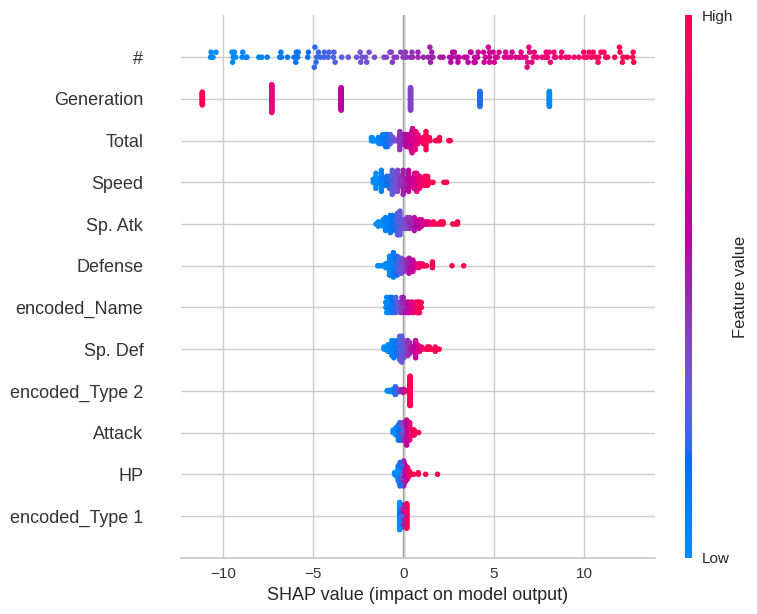

In [11]:
import shap
explainer = shap.Explainer(tuned_model, X_train)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X_scaled.columns)

#Predicciones

In [12]:
y=label_encoders['Legendary'].inverse_transform(y_pred_svc)
Result_df=data.loc[y_test.index]
Result_df['Predicted_Labels']=y
Result_df.drop(columns=['encoded_Name','encoded_Type 1','encoded_Type 2','encoded_Legendary'], inplace=True)
print(Result_df)
Result_df = Result_df.sort_values(by='Predicted_Labels', ascending=False)
print(Result_df)#Resultados ordenados por verdadero y falso

print(data['Generation'].max())#Generación máxima 6, por ende no tiene pokemones de generación 7 en adelante, para predecir se van a usar pokemones de estas generaciones

       #                 Name   Type 1  Type 2  Total  HP  Attack  Defense  \
201  186             Politoed    Water     NaN    500  90      75       75   
797  720  HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
781  710  PumpkabooSmall Size    Ghost   Grass    335  44      66       70   
25    20             Raticate   Normal     NaN    413  55      81       60   
614  554             Darumaka     Fire     NaN    315  70      90       45   
..   ...                  ...      ...     ...    ...  ..     ...      ...   
172  158             Totodile    Water     NaN    314  50      65       64   
416  379            Registeel    Steel     NaN    580  80      75      150   
588  529              Drilbur   Ground     NaN    328  60      85       40   
563  504               Patrat   Normal     NaN    255  45      55       39   
520  469              Yanmega      Bug  Flying    515  86      76       86   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  Predicted_

In [13]:
my_df = pd.DataFrame({
    '#': [791, 723, 888, 810,1014, 910],
    'Name': ['Solgaleo', 'Dartrix', 'Zacian', 'Grookey','Okidogi', 'Crocalor'],
    'Type 1': ['Psychic', 'Grass', 'Fairy', 'Grass','Poison', 'Fire'],
    'Type 2': ['Steel', 'Flying', '', '','Fighting', ''],
    'Total': [680, 420, 660, 310, 555, 411],
    'HP': [137, 79, 92, 50, 88, 81],
    'Attack': [137, 75, 120, 65, 128, 55],
    'Defense': [107, 75, 115, 50, 115, 78],
    'Sp. Atk': [113, 70, 80, 40, 58, 90],
    'Sp. Def': [89, 70, 115, 40, 86, 58],
    'Speed': [97, 52, 138, 65, 80, 49,],
    'Generation': [7,7,8,8,9,9],
    'Legendary':   [True,False,True,False,True,False]
})
for column in columns_to_label_encode:
    label_encoder = label_encoders[column]
    my_df[f'encoded_{column}'] = label_encoder.fit_transform(my_df[column])
print(my_df)
encoded_Label=my_df['encoded_Legendary']
my_df.drop(columns=['encoded_Legendary'], inplace=True)
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
scaler.partial_fit(my_df[numerical_columns])

scaled_data_new = scaler.transform(my_df[numerical_columns])
X_scaled_new = pd.DataFrame(scaled_data_new, columns=numerical_columns)

print(X_scaled_new)

      #      Name   Type 1    Type 2  Total   HP  Attack  Defense  Sp. Atk  \
0   791  Solgaleo  Psychic     Steel    680  137     137      107      113   
1   723   Dartrix    Grass    Flying    420   79      75       75       70   
2   888    Zacian    Fairy              660   92     120      115       80   
3   810   Grookey    Grass              310   50      65       50       40   
4  1014   Okidogi   Poison  Fighting    555   88     128      115       58   
5   910  Crocalor     Fire              411   81      55       78       90   

   Sp. Def  Speed  Generation  Legendary  encoded_Name  encoded_Type 1  \
0       89     97           7       True             4               4   
1       70     52           7      False             1               2   
2      115    138           8       True             5               0   
3       40     65           8      False             2               2   
4       86     80           9       True             3               3   
5       5

In [14]:
y_pred =tuned_model.predict(X_scaled_new)

# Evaluate the model
accuracy= accuracy_score(encoded_Label, y_pred)
mcc = matthews_corrcoef(encoded_Label, y_pred)
report = classification_report(encoded_Label, y_pred)
print("El mcc es ",mcc, "el accuracy es", accuracy)
print("Reporte de Clasificación:\n", report)

El mcc es  0.0 el accuracy es 0.5
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       0.00      0.00      0.00         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6



In [15]:
y=label_encoders['Legendary'].inverse_transform(y_pred)
my_df['Prediction']=y
my_df.drop(columns=['encoded_Name','encoded_Type 1','encoded_Type 2'], inplace=True)
print(my_df)

      #      Name   Type 1    Type 2  Total   HP  Attack  Defense  Sp. Atk  \
0   791  Solgaleo  Psychic     Steel    680  137     137      107      113   
1   723   Dartrix    Grass    Flying    420   79      75       75       70   
2   888    Zacian    Fairy              660   92     120      115       80   
3   810   Grookey    Grass              310   50      65       50       40   
4  1014   Okidogi   Poison  Fighting    555   88     128      115       58   
5   910  Crocalor     Fire              411   81      55       78       90   

   Sp. Def  Speed  Generation  Legendary  Prediction  
0       89     97           7       True       False  
1       70     52           7      False       False  
2      115    138           8       True       False  
3       40     65           8      False       False  
4       86     80           9       True       False  
5       58     49           9      False       False  


#Finalizando el modelo

In [16]:
X_combined_train = pd.concat([X_train,X_scaled_new])
y_train_new= pd.concat([y_train, encoded_Label])

tuned_model.fit(X_combined_train,y_train_new)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
save_model(tuned_model.fit, 'final_model')
loaded_model = load_model('final_model')


Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded
